## Regressão linear no scikit-learn - II

In [2]:
import numpy as np
import pandas as pd

# visualização de dados
import matplotlib.pyplot as plt

# modelo regressão linear
from sklearn.linear_model import LinearRegression

In [3]:
reg = LinearRegression()

In [4]:
# dados do segundo capitulo

x = [-1., -0.77777778, -0.55555556, -0.33333333, -0.11111111,
     0.11111111, 0.33333333, 0.55555556, 0.77777778, 1.]
     
y = [-1.3956201, -0.57177999, -0.21697033, 0.5425699, 0.49406657,
     1.14972239, 1.64228553, 2.1749824, 2.64773614, 2.95684202]

# transformando em numpy array
x, y = np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1)

# Gera a melhor função para descrever os dados
reg.fit(x, y)

# score do modelo
score = reg.score(x, y)

# predição do modelo
y_pred = reg.predict(x)

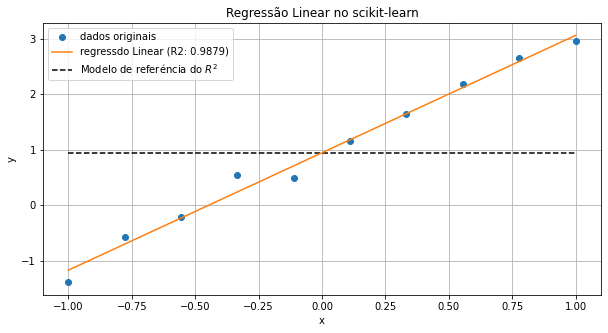

In [5]:
# plot dos dados

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', label='dados originais')
plt.plot(x, y_pred, label='regressdo Linear (R2: {:.4f})'.format(score))
plt.hlines(y=y.mean(), xmin=x.min(), xmax=x.max(), Linestyle='dashed', label='Modelo de referéncia do $R^2$')
plt.legend()
plt.xlabel ("x")
plt.ylabel ("y")
plt.title("Regressão Linear no scikit-learn")
plt.grid()
plt.show()

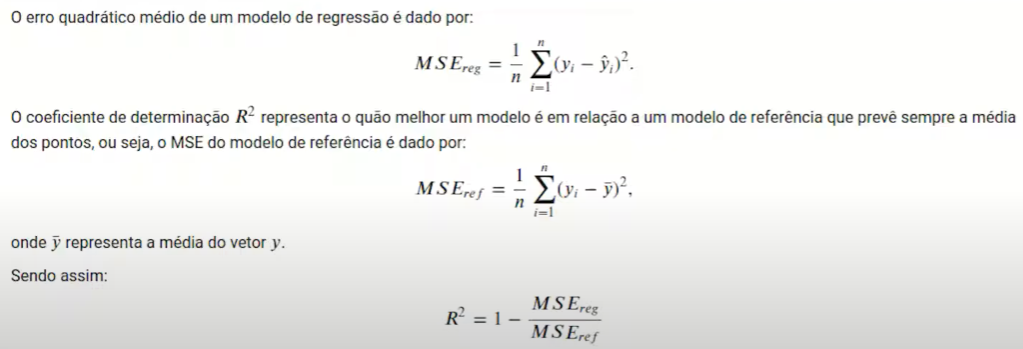

In [19]:
# funcão para o calculo do MSE
def mse(y_true, y_pred, is_ref = False):

    # mse modelo
    if is_ref:
        mse = ((y_true - y_true.mean())**2).mean()
    else:
        mse = ((y_true - y_pred)**2).mean()

    return mse

In [20]:
# função para calculo do coeficiente de determinação R2
def r2(mse_reg, mse_ref):
    return 1 - mse_reg/mse_ref

In [21]:
# visualizando y e y_pred
print("y_true:", y.ravel())
print("y_pred:", y_pred.ravel())

y_true: [-1.3956201  -0.57177999 -0.21697033  0.5425699   0.49406657  1.14972239
  1.64228553  2.1749824   2.64773614  2.95684202]
y_pred: [-1.17461668 -0.70417221 -0.23372774  0.23671675  0.70716122  1.17760569
  1.64805016  2.11849465  2.58893912  3.05938359]


In [22]:
# calculando o mse dos modelos

mse_reg = mse(y_true=y, y_pred=y_pred)

print("MSE do modelo de regressao:", mse_reg)

mse_ref = mse(y_true=y, y_pred=y_pred, is_ref=True)
print("MSE do modelo de referéncia:", mse_ref)

MSE do modelo de regressao: 0.022357993980065553
MSE do modelo de referéncia: 1.8482315266408496


In [23]:
# calculando o R2 score
r2_score = r2(mse_reg=mse_reg, mse_ref=mse_ref)
print("Coeficiente R2 do modelo implementado (calculado):", r2_score)

Coeficiente R2 do modelo implementado (calculado): 0.9879030339771874


In [24]:
# score retornado pelo scikit-learn
r2_score_skl = reg.score(x, y)
print("Coeficiente R2 do modelo implementado (scikit-learn):", r2_score_skl)

Coeficiente R2 do modelo implementado (scikit-learn): 0.9879030339771874
